In [13]:
import os
# 데이터셋의 기본 경로를 설정합니다.
# 'kaggle' 디렉토리가 현재 코드가 실행되는 위치에 있다고 가정합니다.
base_dir = 'final_dataset'
# 'train', 'val', 'test' 각 데이터셋을 순서대로 확인합니다.
for data_set in ['train', 'val', 'test']:
    data_set_path = os.path.join(base_dir, data_set)
    # 해당 경로가 존재하는지 확인합니다.
    if not os.path.exists(data_set_path):
        print(f"경고: '{data_set_path}' 디렉토리가 존재하지 않습니다. 건너뜁니다.")
        continue
    # 현재 데이터셋(train, val, test)의 클래스별 이미지 수를 저장할 딕셔너리입니다.
    class_counts_for_set = {}
    # 클래스 폴더들을 확인합니다.
    for class_name in os.listdir(data_set_path):
        class_path = os.path.join(data_set_path, class_name)
        # 디렉토리인지 확인합니다.
        if os.path.isdir(class_path):
            # 해당 클래스 디렉토리 안의 파일 개수를 셉니다. (숨김 파일 제외)
            file_list = [f for f in os.listdir(class_path) if not f.startswith('.')]
            file_count = len(file_list)
            # 딕셔너리에 저장합니다.
            class_counts_for_set[class_name] = file_count
    # 현재 데이터셋의 결과를 출력합니다.
    print(f"\n=== {data_set.upper()} 이미지 개수 ===")
    total_images_in_set = 0
    # 클래스 이름 순서대로 정렬하여 출력하면 더 보기 좋습니다.
    for class_name, count in sorted(class_counts_for_set.items()):
        print(f"- {class_name}: {count}장")
        total_images_in_set += count
    print(f"총 {data_set.upper()} 이미지 개수: {total_images_in_set}장")


=== TRAIN 이미지 개수 ===
- 1. Enfeksiyonel: 3000장
- 2. Ekzama: 3000장
- 3. Akne: 3706장
- 4. Pigment: 3509장
- 5. Benign: 3000장
- 6. Malign: 3000장
총 TRAIN 이미지 개수: 19215장

=== VAL 이미지 개수 ===
- 1. Enfeksiyonel: 620장
- 2. Ekzama: 887장
- 3. Akne: 777장
- 4. Pigment: 689장
- 5. Benign: 600장
- 6. Malign: 600장
총 VAL 이미지 개수: 4173장

=== TEST 이미지 개수 ===
- 1. Enfeksiyonel: 620장
- 2. Ekzama: 888장
- 3. Akne: 760장
- 4. Pigment: 692장
- 5. Benign: 600장
- 6. Malign: 600장
총 TEST 이미지 개수: 4160장


:돋보기: 1단계: 해시 수집
:열린_파일_폴더: [train] 파티션 스캔 중...
:열린_파일_폴더: [val] 파티션 스캔 중...
:열린_파일_폴더: [test] 파티션 스캔 중...

:빗자루: 2단계: 중복 제거

:느낌표: 총 35개의 이미지에서 중복이 발견되었습니다.
:톱니바퀴: --- 중복 해결 작업 시작 ---
:신분증: [중복 해시] Hash: db01a88e5d... → {'test', 'train'}
 - [삭제] final_dataset/test/4. Pigment/Pigment_00560.jpg

:포장: [train] 내 중복 해시: 53d6aebd09...
 - [삭제] final_dataset/train/4. Pigment/Pigment_01794.jpg

:포장: [train] 내 중복 해시: 3d2d9d159f...
 - [삭제] final_dataset/train/4. Pigment/Pigment_01801.jpg

:포장: [train] 내 중복 해시: 77a67185e3...
 - [삭제] final_dataset/train/4. Pigment/Pigment_00600.jpg

:포장: [train] 내 중복 해시: 5684eacfc9...
 - [삭제] final_dataset/train/4. Pigment/Pigment_01638.jpg

:포장: [train] 내 중복 해시: 599d56c1e4...
 - [삭제] final_dataset/train/4. Pigment/Pigment_01071.jpg

:포장: [train] 내 중복 해시: 352674759d...
 - [삭제] final_dataset/train/4. Pigment/Pigment_01815.jpg

:포장: [train] 내 중복 해시: ba2aa59e64...
 - [삭제] final_dataset/train/4. Pigment/Pigment_01195.jpg

:포장: [train] 내 중복 해시: 2dc900d557...
 - [삭제] fi

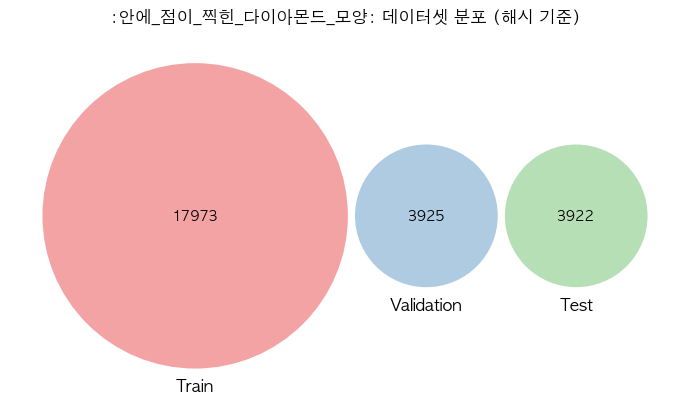

In [11]:
import os
import hashlib
import shutil
from pathlib import Path
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
# --- 설정 ---
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
def compute_image_hash(image_path):
    with open(image_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()
def collect_hashes(base_dir):
    hash_to_paths = defaultdict(list)
    for partition in ["train", "val", "test"]:
        partition_path = base_dir / partition
        if not partition_path.is_dir():
            continue
        print(f":열린_파일_폴더: [{partition}] 파티션 스캔 중...")
        for img_path in partition_path.rglob("*.jpg"):
            img_hash = compute_image_hash(img_path)
            hash_to_paths[img_hash].append(img_path)
    return hash_to_paths
def resolve_duplicates(hash_to_paths, base_dir):
    duplicate_hashes = {h: paths for h, paths in hash_to_paths.items() if len(paths) > 1}
    if not duplicate_hashes:
        print("\n:흰색_확인_표시: 중복된 이미지가 없습니다. 작업을 종료합니다.")
        return
    print(f"\n:느낌표: 총 {len(duplicate_hashes)}개의 이미지에서 중복이 발견되었습니다.")
    print(":톱니바퀴: --- 중복 해결 작업 시작 ---")
    for h, paths in duplicate_hashes.items():
        partitions_involved = {p.parts[1] for p in paths}
        if len(partitions_involved) > 1:
            # Case 1: 파티션 간 중복
            print(f":신분증: [중복 해시] Hash: {h[:10]}... → {partitions_involved}")
            train_path = next((p for p in paths if 'train' in p.parts), None)
            other_paths = [p for p in paths if p != train_path]
            if train_path:
                for p in other_paths:
                    p.unlink()
                    print(f" - [삭제] {p}")
            else:
                source_path = other_paths[0]
                class_folder = source_path.parent.name
                dest_dir = base_dir / 'train' / class_folder
                dest_dir.mkdir(parents=True, exist_ok=True)
                dest_path = dest_dir / source_path.name
                shutil.move(source_path, dest_path)
                print(f" - [이동] {source_path} → {dest_path}")
                for p in other_paths[1:]:
                    p.unlink()
                    print(f" - [삭제] {p}")
        else:
            # Case 2: 동일 파티션 내 중복
            partition_name = partitions_involved.pop()
            print(f"\n:포장: [{partition_name}] 내 중복 해시: {h[:10]}...")
            for p in paths[1:]:
                p.unlink()
                print(f" - [삭제] {p}")
    print("\n:흰색_확인_표시: 모든 중복 해결 작업이 완료되었습니다.")
def verify_no_leak(base_dir, title="최종 상태 확인"):
    hash_sets = {"train": set(), "val": set(), "test": set()}
    for split in hash_sets.keys():
        partition_path = base_dir / split
        if not partition_path.is_dir():
            continue
        for img_path in partition_path.rglob("*.jpg"):
            img_hash = compute_image_hash(img_path)
            hash_sets[split].add(img_hash)
    train, val, test = hash_sets['train'], hash_sets['val'], hash_sets['test']
    print(f"\n:막대_차트: {title} 데이터 개수:")
    print(f"Train: {len(train)}개")
    print(f"Validation: {len(val)}개")
    print(f"Test: {len(test)}개")
    o_tv = len(train & val)
    o_vt = len(val & test)
    o_tt = len(train & test)
    o_all = len(train & val & test)
    print(f"\n:흰색_확인_표시: 교집합 상태:")
    print(f"- Train ∩ Val: {o_tv}개")
    print(f"- Val ∩ Test: {o_vt}개")
    print(f"- Train ∩ Test: {o_tt}개")
    print(f"- 전체 중복: {o_all}개")
    if o_tv == 0 and o_vt == 0 and o_tt == 0:
        print(":짠: 데이터 누수 완전 해결!")
    else:
        print(":경고: 아직 일부 누수가 남아있습니다.")
    # Venn 시각화
    plt.figure(figsize=(7, 6))
    venn3([train, val, test],
          set_labels=['Train', 'Validation', 'Test'],
          set_colors=["#E41A1C", "#377EB8", "#4DAF4A"])
    plt.title(":안에_점이_찍힌_다이아몬드_모양: 데이터셋 분포 (해시 기준)")
    plt.tight_layout()
    plt.show()
def main():
    base_dir = Path("final_dataset")
    print(":돋보기: 1단계: 해시 수집")
    hash_to_paths = collect_hashes(base_dir)
    print("\n:빗자루: 2단계: 중복 제거")
    resolve_duplicates(hash_to_paths, base_dir)
    print("\n:렌즈가_오른쪽_위에_있는_확대경: 3단계: 중복 제거 후 검증 및 시각화")
    verify_no_leak(base_dir)
if __name__ == "__main__":
    main()








In [15]:
from pathlib import Path
import pandas as pd
def create_dataset_df(directory: Path):
    image_paths, labels = [], []
    for image_path in sorted(directory.glob("*/*.jpg")):
        image_paths.append(str(image_path))
        labels.append(image_path.parent.name)  # '1. Enfeksiyonel' 등
    return pd.DataFrame({
        'filepath': image_paths,
        'label': labels
    })
train_df = create_dataset_df(Path('final_dataset/train'))
val_df = create_dataset_df(Path('final_dataset/val'))
test_df = create_dataset_df(Path('final_dataset/test'))
# 클래스 번호 기준 정렬 함수
def extract_label_number(label):
    return int(label.split('.')[0])
class_names = sorted(train_df['label'].unique(), key=extract_label_number)
# label → 숫자 매핑
class_to_int = {name: i for i, name in enumerate(class_names)}
int_to_class = {i: name for i, name in enumerate(class_names)}
# 숫자 라벨 추가
for df in [train_df, val_df, test_df]:
    df['label_int'] = df['label'].map(class_to_int)

/var/folders/sm/g93q316j7pd7kfn7fbtq91rw0000gp/T/ipykernel_45747/4165284323.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


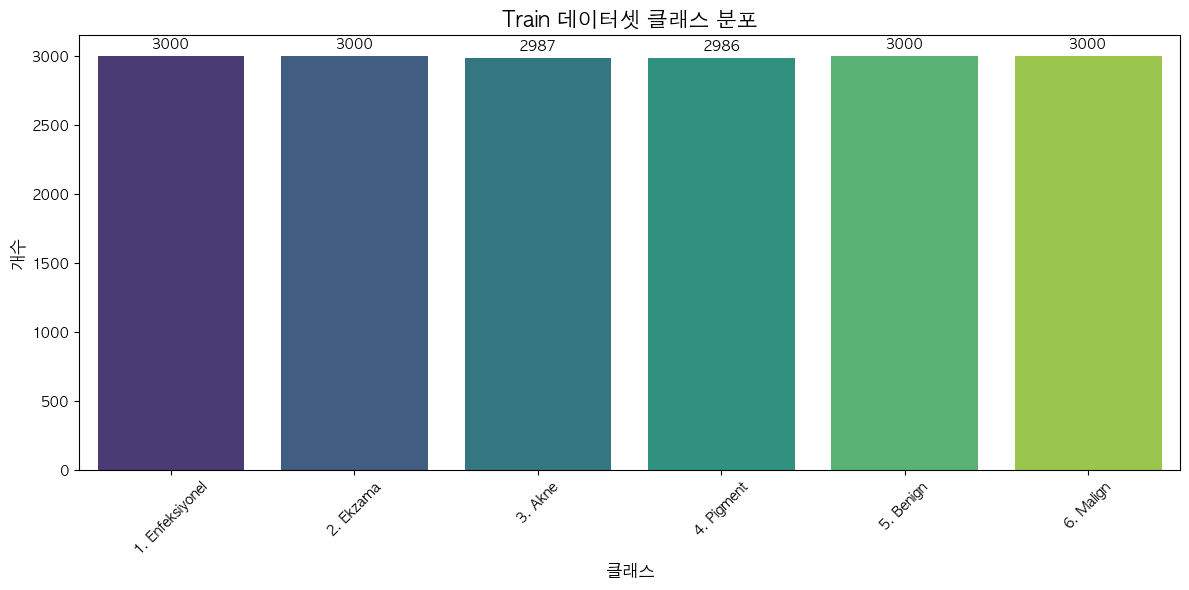

/var/folders/sm/g93q316j7pd7kfn7fbtq91rw0000gp/T/ipykernel_45747/4165284323.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


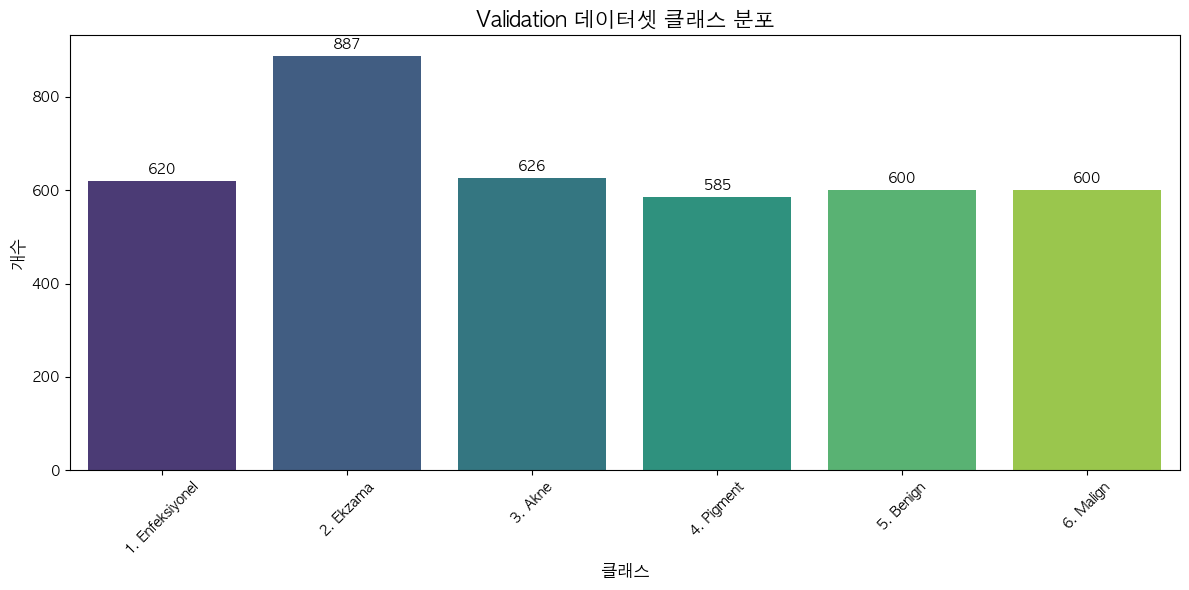

/var/folders/sm/g93q316j7pd7kfn7fbtq91rw0000gp/T/ipykernel_45747/4165284323.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


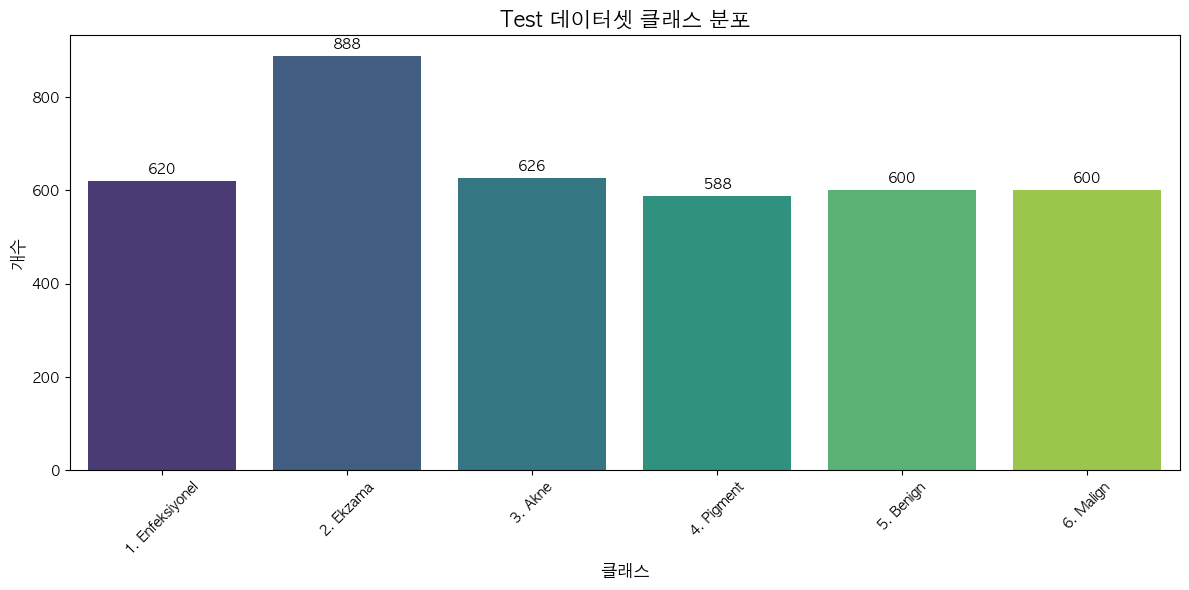

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
# 한글 폰트 설정
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
# 정렬 함수
import re
def label_sort_key(label):
    match = re.match(r"(\d+)\.", label)
    return int(match.group(1)) if match else float('inf')
def plot_class_distribution(df, title):
    class_counts = df['label'].value_counts()
    class_counts = class_counts.sort_index(key=lambda x: [label_sort_key(i) for i in x])
    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10,
                         xytext=(0, 8), textcoords='offset points')
    plt.title(title, fontsize=15)
    plt.xlabel('클래스', fontsize=12)
    plt.ylabel('개수', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_class_distribution(train_df, "Train 데이터셋 클래스 분포")
plot_class_distribution(val_df, "Validation 데이터셋 클래스 분포")
plot_class_distribution(test_df, "Test 데이터셋 클래스 분포")